### Index of refraction of air

In this experiment we used the HeNe laser and passed one of the beams through a 10cm vacuum chamber. The beam passes through the vacuum chamber twice, and so has a total path length of 20cm inside the chamber. The path length difference in the glass of the vacuum chamber is not relevant to this experiment since it is kept constant throughout, and we don't need to be at the ZPL point.

We first evacuated the air from the chamber, started the vid_capture program and ran it for 2 minutes, then slowly leaked air back into the vacuum chamber. Based on prior reading, we  expect the index of refraction of air at STP to be about 1.00029. The number of expected fringes that should pass between a vacuum and having the chamber full of air again is computed below.

In [1]:
(1-1.00029^-1)*20*10^7/632.8

ans =  91.630


$$(1-1.00029^{-1}) * 20cm * 10^7 \frac{nm}{cm} \div 632.8 \frac{nm}{fringe} \approx 91.6 \textrm{ fringes}$$

#### Data processing

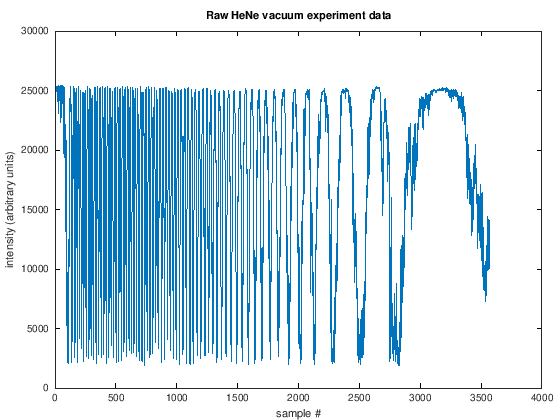

In [2]:
v = csvread('test_data-2019-01-23/HeNe-vacuum-120');
plot(v)
title('Raw HeNe vacuum experiment data')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

Visually it looks like all of the peaks are above 20000 at some point and all of the troughs are below 8000 at some point. So we'll try using a hysteresis based counter.

In [3]:
% count the peaks with hysteresis for counting the max and resetting
function count = hysteresis_count(low, high, data)
    count = 0;
    found_max = 0;
    for i=1:length(data)
        if (!found_max && data(i) > 20000)
            count++;
            found_max = 1;
        elseif (found_max && data(i) < 8000)
            found_max = 0;
        end
    end
end

count = hysteresis_count(8000, 20000, v)
% perturb hysteresis limits slightly to verify that the count is correct
if (hysteresis_count(6000, 22000, v) != count ||
    hysteresis_count(10000, 18000, v) != count)
    printf 'counts are not the same!!!\n';
else
    printf('counts seem to be consistent\n');
end

count =  70
counts seem to be consistent


Based on the value we found for STP, the number of peaks we found seems to be okay for its order of magnitude, but it is. Now we compute the index of refraction.

In [4]:
n_fringe = 70;
format long g
idx = (1 - n_fringe * 632.8 / 10^7 / 20)^-1

idx =     1.00022152906426


We find a value for our index of refraction of air to be 1.00022,
which is in a similar order of magnitude, but the offset from 1 is -24% the value at STP.
We don't think this large of a difference can be explained by
the difference in the air conditions from STP. One of our initial guesses is that the pump
is unable to create a perfect vacuum. Also, it could be that the index of refraction in
air for shorter wavelengths is quite different from the value we found online.

We will try this experiment again next day.




